In [1]:
import dill
from utils import id_to_name, name_to_id
import seaborn as sns
import matplotlib.pyplot as plt

In /local/mk98/miniconda3/envs/methyl/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /local/mk98/miniconda3/envs/methyl/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /local/mk98/miniconda3/envs/methyl/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /local/mk98/miniconda3/envs/methyl/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /local/mk

In [2]:
def load_diffmeth_results(fold: str):
    """Load differential methylation results for a fold."""
    with open(f"./../data/GEO/diffmeth/diffmeth_fold{fold}", 'rb') as f:
        return dill.load(f)

def get_significant_probes(res_per_tissue):
    from statsmodels.stats.multitest import multipletests

    """Get significant probes for each tissue using multiple testing correction."""
    probe_per_tissue = {}
    for tissue, tissue_res in res_per_tissue.items():
        adjusted = multipletests(tissue_res.PValue, alpha=0.05)
        pvalue_cutoff = adjusted[3]
        probe_per_tissue[tissue] = list(tissue_res[tissue_res['PValue'] <= pvalue_cutoff].index)
    return probe_per_tissue

In [3]:
diffmeth_folds = dict()
for fold in range(3):
    res_per_tissue = load_diffmeth_results(fold)
    probe_per_tissue = get_significant_probes(res_per_tissue)

    diffmeth_folds[fold] = probe_per_tissue

In [4]:
folds = dill.load(open(f'./../data/GEO/preprocessed/training_folds.dill', 'rb'))

In [ ]:
wanted_mv[wanted_probes]

In [ ]:
wanted_tissue = 'bone tissue'
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for fold in range(3):
    wanted_id = name_to_id[wanted_tissue][0]
    training_mv, training_meta, _, _ = folds[fold]
    wanted_meta = training_meta[training_meta['training.ID'] == wanted_id]
    wanted_mv = training_mv.loc[wanted_meta.index]
    wanted_probes = diffmeth_folds[fold][wanted_id]

    sns.kdeplot(data=wanted_mv[wanted_probes].T, legend=False, ax=axes[fold])
    if fold==1: axes[fold].set_title(f'{wanted_tissue}')

plt.tight_layout()
plt.show()

In [ ]:
wanted_tissue = 'visceral fat'
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for fold in range(3):
    wanted_id = name_to_id[wanted_tissue][0]
    training_mv, training_meta, _, _ = folds[fold]
    wanted_meta = training_meta[training_meta['training.ID'] == wanted_id]
    wanted_mv = training_mv.loc[wanted_meta.index]
    wanted_probes = diffmeth_folds[fold][wanted_id]

    sns.kdeplot(data=wanted_mv[wanted_probes].T, legend=False, ax=axes[fold])
    if fold==1: axes[fold].set_title(f'{wanted_tissue}')

plt.tight_layout()
plt.show()

In [ ]:
for fold in range(3):
    common_elements = set.intersection(*map(set, diffmeth_folds[fold].values()))
    print(len(common_elements))

In [ ]:
for fold in range(3):
    subset_keys = [name_to_id[x][0] for x in ['myoblast','cardiovascular system','oral epithelium','esophagus','airway','embryonic stem cell','fallopian tube','ovary','prostate gland', 'skin of body','rectum','fibroblast']]
    subset_dict = {k: diffmeth_folds[fold][k] for k in subset_keys if k in diffmeth_folds[fold]}  

    common_elements = set.intersection(*map(set, subset_dict.values()))
    print(len(common_elements))

In [ ]:
for fold in range(3):
    subset_keys = [name_to_id[x][0] for x in ['bone tissue', 'visceral fat']]
    subset_dict = {k: diffmeth_folds[fold][k] for k in subset_keys if k in diffmeth_folds[fold]}  

    common_elements = set.intersection(*map(set, subset_dict.values()))
    print(f"shared: {len(common_elements)}")
    
    print(f"bone tissue: {len(diffmeth_folds[fold][name_to_id['bone tissue'][0]])}")
    print(f"visceral fat: {len(diffmeth_folds[fold][name_to_id['visceral fat'][0]])}")

In [ ]:
wanted_tissue = 'bone tissue'
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for fold in range(3):
    wanted_id = name_to_id[wanted_tissue][0]
    training_mv, training_meta, _, _ = folds[fold]
    wanted_meta = training_meta[training_meta['training.ID'] == wanted_id]
    wanted_mv = training_mv.loc[wanted_meta.index]
    wanted_mv.median()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
training_meta['training.Name'] = training_meta['training.ID'].map(lambda x: id_to_name[x][0])
weird = ['myoblast','cardiovascular system','oral epithelium','esophagus','airway','embryonic stem cell','fallopian tube','ovary','prostate gland', 'skin of body','rectum','fibroblast']
training_meta['weird'] = training_meta['training.Name'].isin(weird)

In [ ]:
wanted_tissue = 'bone tissue'
wanted_id = name_to_id[wanted_tissue][0]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

weird = {'myoblast', 'cardiovascular system', 'oral epithelium', 'esophagus', 'airway',
         'embryonic stem cell', 'fallopian tube', 'ovary', 'prostate gland',
         'skin of body', 'rectum', 'fibroblast'}

for fold in range(3):
    wanted_probes = diffmeth_folds[fold][wanted_id]
    
    training_mv, training_meta, _, _ = folds[fold]
    training_meta['training.Name'] = training_meta['training.ID'].map(lambda x: id_to_name[x][0])
    training_meta['weird'] = training_meta['training.Name'].isin(weird)
    training_meta.loc[training_meta['training.ID'] == wanted_id, 'weird'] = wanted_tissue
    
    wanted_mv = training_mv[wanted_probes]
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(wanted_mv)

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=training_meta['weird'], 
                    palette="tab10", ax=axes[fold], legend=(fold == 2))  # Legend only on last plot
    
    axes[fold].set_xlabel("PC1")
    axes[fold].set_ylabel("PC2")
    axes[fold].set_title(f"Fold {fold+1}")

# Move legend outside the last subplot
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, title="Weird", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
wanted_tissue = 'visceral fat'
wanted_id = name_to_id[wanted_tissue][0]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

weird = {'myoblast', 'cardiovascular system', 'oral epithelium', 'esophagus', 'airway',
         'embryonic stem cell', 'fallopian tube', 'ovary', 'prostate gland',
         'skin of body', 'rectum', 'fibroblast'}

for fold in range(3):
    wanted_probes = diffmeth_folds[fold][wanted_id]
    
    training_mv, training_meta, _, _ = folds[fold]
    training_meta['training.Name'] = training_meta['training.ID'].map(lambda x: id_to_name[x][0])
    training_meta['weird'] = training_meta['training.Name'].isin(weird)
    training_meta.loc[training_meta['training.ID'] == wanted_id, 'weird'] = wanted_tissue
    
    wanted_mv = training_mv[wanted_probes]
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(wanted_mv)

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=training_meta['weird'], 
                    palette="tab10", ax=axes[fold], legend=(fold == 2))  # Legend only on last plot
    
    axes[fold].set_xlabel("PC1")
    axes[fold].set_ylabel("PC2")
    axes[fold].set_title(f"Fold {fold+1}")

# Move legend outside the last subplot
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, title="Weird", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
tissue_pca = dict()

In [ ]:
weird = {'myoblast', 'cardiovascular system', 'oral epithelium', 'esophagus', 'airway',
         'embryonic stem cell', 'fallopian tube', 'ovary', 'prostate gland',
         'skin of body', 'rectum', 'fibroblast'}
# weird = {'airway','fibroblast'}
legend_handles = None

fig, axes = plt.subplots(3, 4, figsize=(15, 12))
axes = axes.flatten()  # Convert to 1D array for easy indexing

for idx, wanted_tissue in enumerate(weird):
# for idx, wanted_tissue in enumerate({'myoblast','rectum'}):
    print(wanted_tissue)  # Fixed print statement
    
    row, col = divmod(idx, 3)  # Compute row and column index
    wanted_id = name_to_id[wanted_tissue][0]
    
    fold = 0  # Only processing fold 0
    wanted_probes = diffmeth_folds[fold][wanted_id]
    wanted_holdout_meta = holdout_meta[holdout_meta['training.ID']==wanted_id]
    wanted_holdout_mv = holdout_mv.loc[wanted_holdout_meta.index]
    
    _,_, training_mv, training_meta = folds[fold]

    training_meta['training.Name'] = training_meta['training.ID'].map(lambda x: id_to_name[x][0])
    
    # Assign 'weird' labels
    training_meta['weird'] = np.where(training_meta['training.Name'].isin(weird), "other", "other")
    training_meta.loc[training_meta['training.ID'] == wanted_id, 'weird'] = 'tissue'
    training_meta.loc[training_meta['training.ID'] == name_to_id['bone tissue'][0], 'weird'] = 'bone tissue'
    training_meta.loc[training_meta['training.ID'] == name_to_id['visceral fat'][0], 'weird'] = 'visceral fat'
    
    wanted_mv = training_mv[wanted_probes]

    if wanted_id in tissue_pca:
        pca = tissue_pca[wanted_id]
    else:
        # PCA transformation
        pca = PCA(n_components=2).fit(wanted_mv)
        tissue_pca[wanted_id] = pca
        
    X_pca = pca.transform(wanted_mv)
    
    scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=training_meta['weird'], 
                    palette="tab10", ax=axes[idx], s=15, alpha=0.6)  # Hide legends in subplots
    
    # Store legend handles from the first plot
    if legend_handles is None:
        legend_handles, _ = scatter.get_legend_handles_labels()

    scatter.get_legend().remove()

    axes[idx].set_xlabel("PC1")
    axes[idx].set_ylabel("PC2")
    axes[idx].set_title(f"{wanted_tissue} (Fold {fold})")

# Add legend outside the last subplot
fig.legend(handles=legend_handles, title="Weird", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
import numpy as np

In [7]:
weird = {'myoblast', 'cardiovascular system', 'oral epithelium', 'esophagus', 'airway',
         'embryonic stem cell', 'fallopian tube', 'ovary', 'prostate gland',
         'skin of body', 'rectum', 'fibroblast'}
weird = {'airway'}

fold = 0  # Only processing fold 0

training_mv, training_meta, holdout_mv, holdout_meta = folds[fold]

for tissue_name in weird:
    print(tissue_name)
    tissue_id = name_to_id[tissue_name][0]
    tissue_meta = holdout_meta[holdout_meta['training.ID']==tissue_id]
    tissue_mv = holdout_mv.loc[tissue_meta.index][tissue_probes]

    if tissue_meta.empty:
        continue
        
    print(tissue_mv.shape, training_mv[tissue_probes].shape)

    # Compute cosine similarity
    holdout_norms = np.sqrt((holdout_data.to_numpy()**2).sum(axis=1, keepdims=True))  # (N_holdout, 1)
    tissue_norms = np.sqrt((tissue_data.to_numpy()**2).sum(axis=1, keepdims=True))
    corr_matrix = (holdout_data @ tissue_data.T) / (holdout_norms * tissue_norms.T)

    tissue_corr = np.corrcoef(tissue_mv, training_mv[tissue_probes])
    tissue_corr = pd.DataFrame(tissue_corr[:tissue_mv.shape[0], tissue_mv.shape[0]:], index=tissue_mv.index, columns=training_mv.index)

    print(tissue_corr.shape)

    df = training_meta.groupby("training.ID").apply(
        lambda g: tissue_corr[g.index].mean(axis=1).rename(g.name)
    )
    
    break

airway
(8, 17457) (6788, 17457)
(8, 6788)


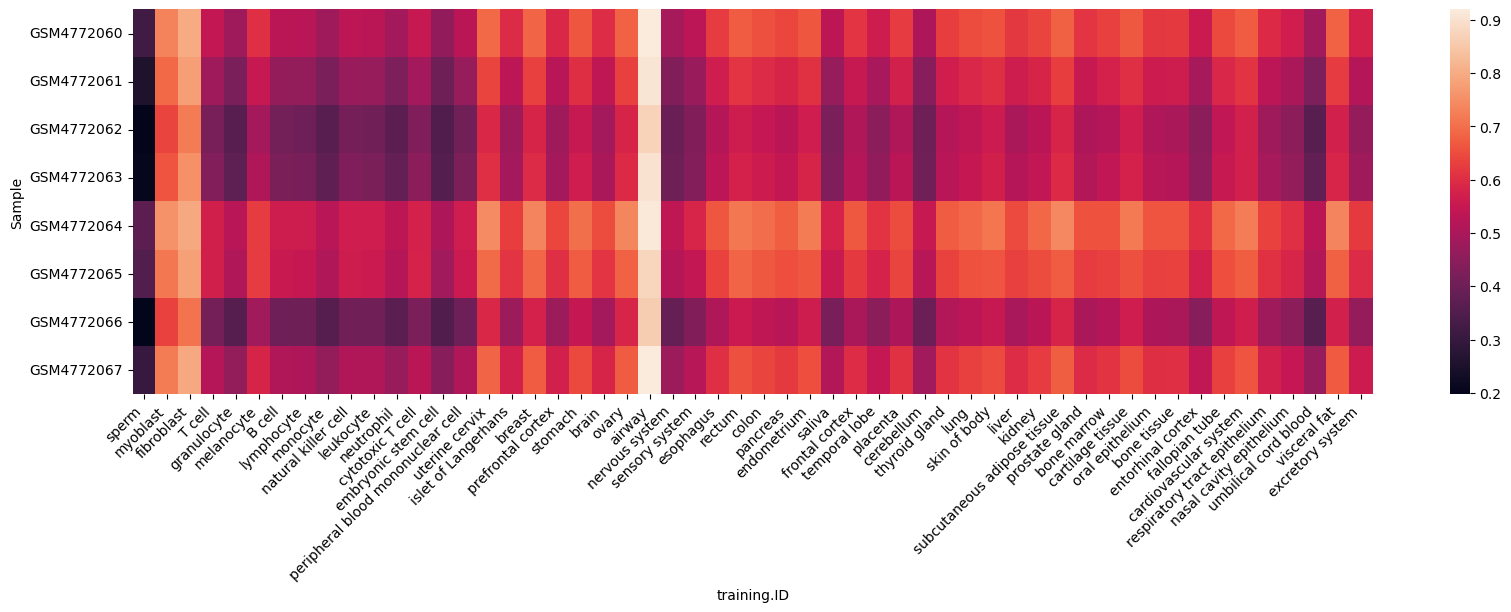

In [11]:
plt.figure(figsize=(20, 5))
sns.heatmap(df.T, xticklabels=[id_to_name[x][0] for x in df.T.columns])

plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
fold0 = dill.load(open(f'./../data/GEO/diffmeth/diffmeth_corr_f0.pkl', 'rb'))

In [57]:
fold0_airway_dict = fold0[fold0['true']==name_to_id['airway'][0]]
fold0_airway_dict

,corr,pred,true,dict
f0.GSM4772060,0.968771,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7183726722971208, 'CL:0000056..."
f0.GSM4772061,0.967847,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7127156840518315, 'CL:0000056..."
f0.GSM4772062,0.965171,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7028255050359037, 'CL:0000056..."
f0.GSM4772063,0.968278,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7032708369079902, 'CL:0000056..."
f0.GSM4772064,0.966769,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7357890529231254, 'CL:0000056..."
f0.GSM4772065,0.968307,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7193231832034395, 'CL:0000056..."
f0.GSM4772066,0.964145,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.701501721692394, 'CL:0000056'..."
f0.GSM4772067,0.967551,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7237455302682543, 'CL:0000056..."


In [97]:
files = [
    './../extra/holdout_x_airway.csv',
    './../extra/holdout_x_visceral fat.csv',
    './../extra/holdout_x_bone tissue.csv',
    './../extra/holdout_x_esophagus.csv'
]

df = pd.concat([pd.read_csv(f, index_col=0) for f in files], axis=1)

In [98]:
df.shape

(3663, 14352)

<AxesSubplot:>

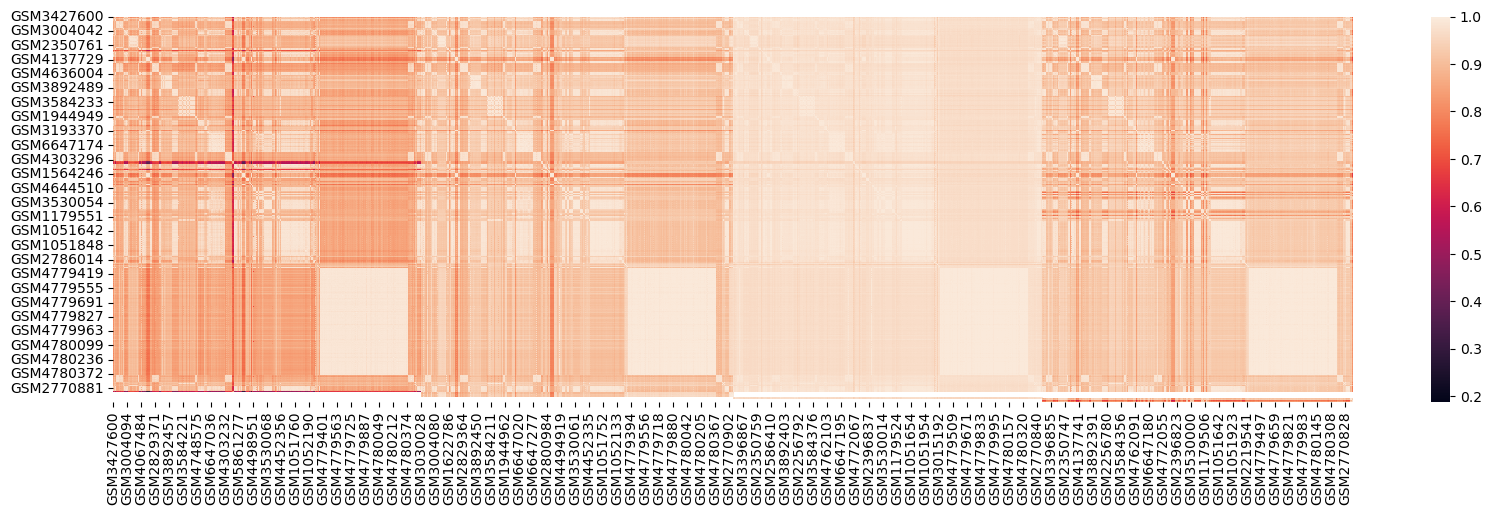

In [99]:
plt.figure(figsize=(20, 5))
sns.heatmap(df)

In [101]:
holdout_airway_idx = holdout_meta[holdout_meta['training.ID']==name_to_id['airway'][0]].index

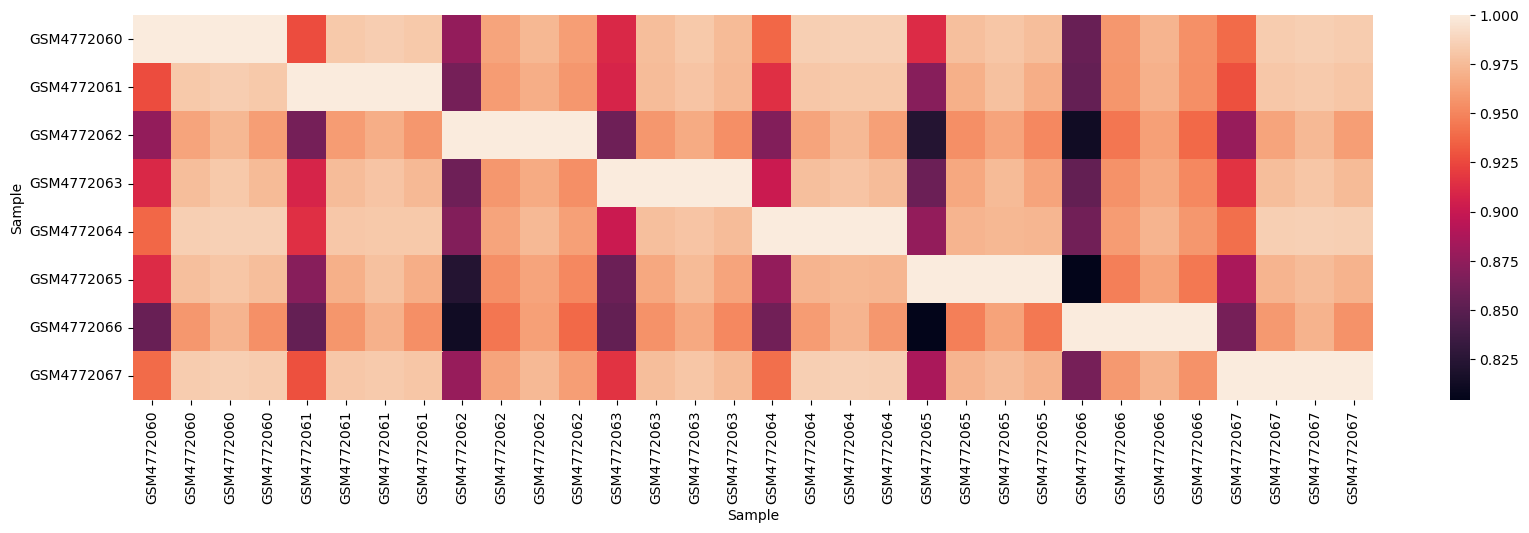

In [106]:
plt.figure(figsize=(20, 5))
ax = sns.heatmap(df.loc[holdout_airway_idx, holdout_airway_idx], xticklabels=True)

In [103]:
subset_meta = training_meta[training_meta['training.ID'].isin([name_to_id[x][0] for x in ['airway','bone tissue','visceral fat','esophagus']])]

In [104]:
ids_sorted_by_tissue = list(subset_meta.sort_values(by='training.ID').index)
len(ids_sorted_by_tissue)

100

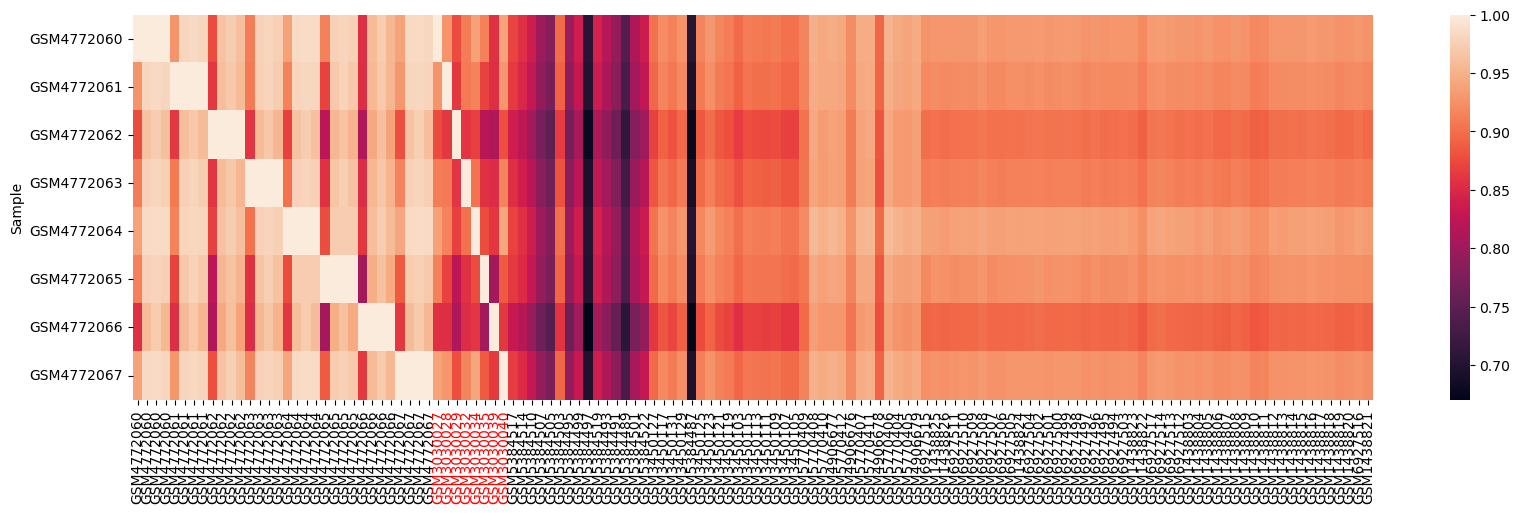

In [111]:
plt.figure(figsize=(20, 5))
ax = sns.heatmap(df.loc[holdout_airway_idx, list(holdout_airway_idx)+list(ids_sorted_by_tissue)], xticklabels=True)
# ax = sns.heatmap(df.loc[holdout_airway_idx, list(ids_sorted_by_tissue)], xticklabels=True)

for label in ax.get_xticklabels():
    label.set_color('red' if label.get_text() in subset_meta.index.values and 
                    subset_meta.loc[subset_meta.index == label.get_text(), 'training.ID'].values[0] == name_to_id['airway'][0] 
                    else 'black')

plt.show()

In [59]:
df_expanded[name_to_id['airway'][0]]

f0.GSM4772060    0.917926
f0.GSM4772061    0.905878
f0.GSM4772062    0.871311
f0.GSM4772063    0.896414
f0.GSM4772064    0.896145
f0.GSM4772065    0.877299
f0.GSM4772066    0.862048
f0.GSM4772067    0.916255
Name: UBERON:0001005, dtype: float64

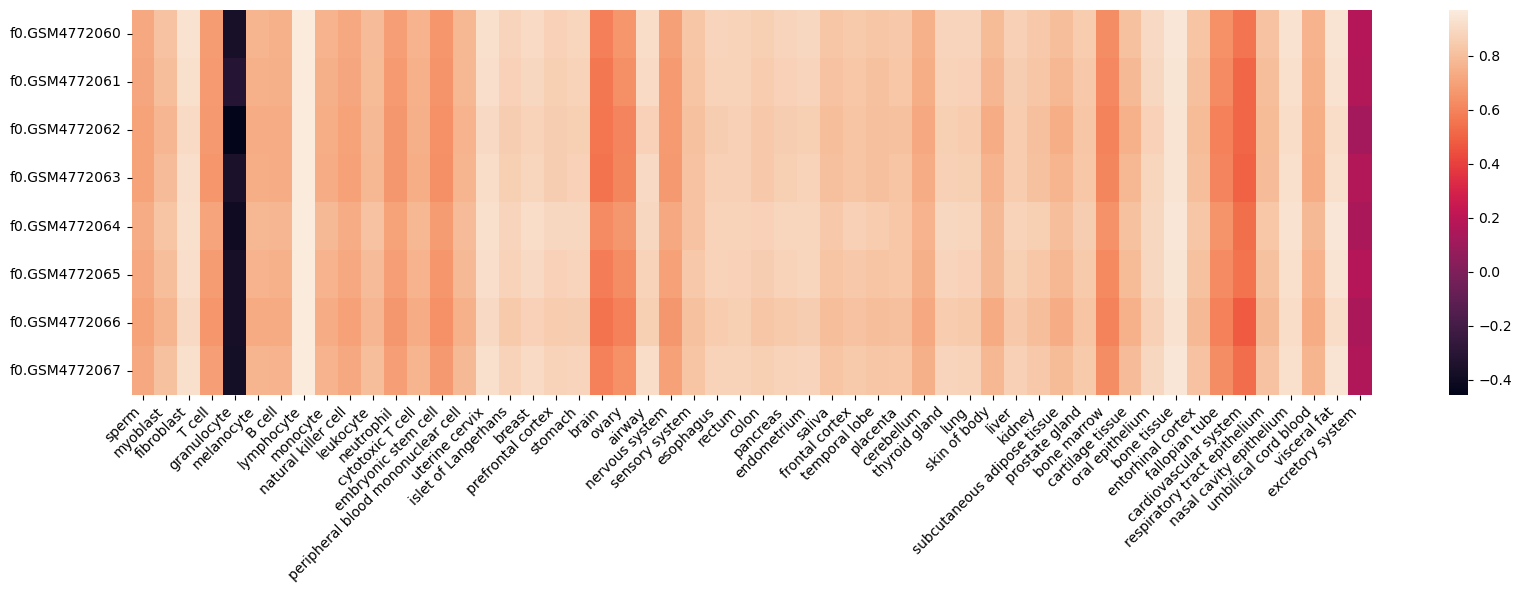

In [55]:
df_expanded = pd.DataFrame.from_records(fold0_airway_dict['dict'].to_list(), index=fold0_airway_dict.index)

plt.figure(figsize=(20, 5))
sns.heatmap(df_expanded, xticklabels=[id_to_name[x][0] for x in df_expanded.columns],yticklabels=True)

plt.xticks(rotation=45, ha='right')
plt.show()

,corr,pred,true,dict
f0.GSM3427600,0.976228,CL:0000542,CL:0000084,"{'CL:0000019': 0.7774512778480006, 'CL:0000056..."
f0.GSM3427601,0.974223,CL:0000542,CL:0000084,"{'CL:0000019': 0.7801431743855374, 'CL:0000056..."
f0.GSM3427602,0.974729,CL:0000542,CL:0000084,"{'CL:0000019': 0.7808447489311695, 'CL:0000056..."
f0.GSM3427603,0.974918,CL:0000542,CL:0000084,"{'CL:0000019': 0.7886878458912456, 'CL:0000056..."
f0.GSM3427614,0.978561,CL:0000542,CL:0000084,"{'CL:0000019': 0.7484650306180275, 'CL:0000056..."
...,...,...,...,...
f0.GSM3080996,0.980600,CL:0000084,CL:0000084,"{'CL:0000019': 0.7648089345833144, 'CL:0000056..."
f0.GSM3080997,0.979332,CL:0000084,CL:0000084,"{'CL:0000019': 0.767982051714803, 'CL:0000056'..."
f0.GSM3080998,0.981529,CL:0000910;BTO:0000289,CL:0000084,"{'CL:0000019': 0.7587479633514732, 'CL:0000056..."
f0.GSM3081000,0.980684,CL:0000084,CL:0000084,"{'CL:0000019': 0.7710422772561419, 'CL:0000056..."


In [16]:
df.T

training.ID,CL:0000019,CL:0000056,CL:0000057,CL:0000084,CL:0000094,CL:0000148,CL:0000236,CL:0000542,CL:0000576,CL:0000623,...,UBERON:0002424,UBERON:0002481,UBERON:0002728,UBERON:0003889,UBERON:0004535,UBERON:0004802,UBERON:0005384,UBERON:0012168,UBERON:0035818,UBERON:8450002
Sample,,,,,,,,,,,,,,,,,,,,,
GSM4772060,0.319003,0.732732,0.800622,0.541451,0.482101,0.605684,0.528316,0.524557,0.482529,0.534312,...,0.619414,0.622220,0.558167,0.644792,0.674039,0.592839,0.565751,0.487001,0.679898,0.577138
GSM4772061,0.255983,0.693129,0.776456,0.481205,0.420098,0.550423,0.467652,0.462674,0.420527,0.472877,...,0.559894,0.561796,0.493448,0.588693,0.611586,0.531707,0.503998,0.425968,0.625611,0.516607
GSM4772062,0.201471,0.638759,0.720417,0.419268,0.361540,0.490626,0.408914,0.402815,0.363248,0.412118,...,0.511749,0.504670,0.450957,0.540024,0.574916,0.484118,0.450983,0.365835,0.574612,0.465738
GSM4772063,0.205628,0.661458,0.754521,0.436841,0.373297,0.510402,0.423796,0.417558,0.376171,0.429200,...,0.524320,0.520911,0.459014,0.552462,0.574152,0.495682,0.464252,0.378946,0.585887,0.479488
GSM4772064,0.371410,0.758343,0.794549,0.571474,0.525895,0.624769,0.561871,0.562341,0.526310,0.564536,...,0.660884,0.660873,0.604980,0.692805,0.724357,0.636778,0.605924,0.527449,0.733872,0.620954
GSM4772065,0.350954,0.716220,0.778771,0.570089,0.508957,0.623387,0.555097,0.549820,0.510176,0.562960,...,0.631521,0.634671,0.574555,0.652693,0.676542,0.608608,0.586516,0.514684,0.679681,0.595863
GSM4772066,0.197018,0.634632,0.705460,0.412684,0.358758,0.486085,0.400902,0.398384,0.359290,0.405347,...,0.506680,0.502050,0.445333,0.537597,0.567544,0.483271,0.448449,0.362855,0.574683,0.465644
GSM4772067,0.302093,0.720526,0.793983,0.519964,0.464898,0.582460,0.507895,0.505173,0.464890,0.512294,...,0.602340,0.603770,0.539629,0.630948,0.660817,0.574349,0.546210,0.468745,0.669674,0.559172


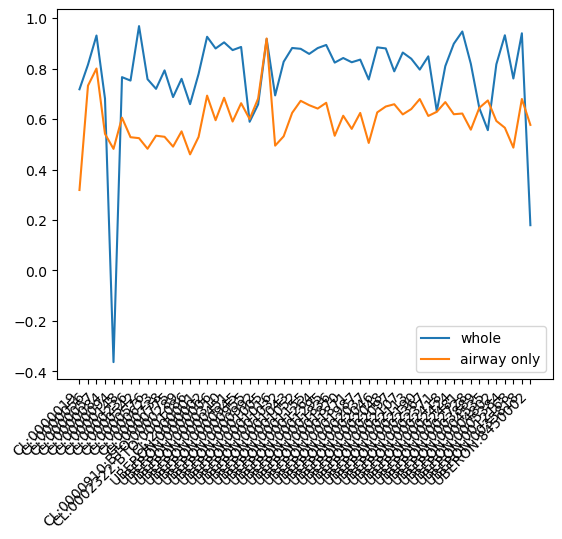

In [29]:
plt.plot(fold0[fold0['true']==name_to_id['airway'][0]]['dict'].iloc[0].values(), label='whole')
plt.plot(df.T.iloc[0], label='airway only')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
training_mv.columns[:10]

Index(['cg13869341', 'cg15560884', 'cg01014490', 'cg23803172', 'cg05898754',
       'cg03128332', 'cg18147296', 'cg05597748', 'cg00111697', 'cg13938959'],
      dtype='object', name='probe')

In [13]:
holdout_mv.columns[:10]

Index(['cg13869341', 'cg15560884', 'cg01014490', 'cg23803172', 'cg05898754',
       'cg03128332', 'cg18147296', 'cg05597748', 'cg00111697', 'cg13938959'],
      dtype='object', name='probe')

In [43]:
airway_meta.shape

(8, 10)

In [44]:
FOLD = 0  # Only Fold 0

rest_Mv, rest_meta, holdout_Mv, holdout_meta = folds[FOLD]
airway_meta = holdout_meta[holdout_meta['training.ID']==name_to_id['airway'][0]]
airway_Mv = holdout_Mv.loc[airway_meta.index]

# Compute batch correlations
corr_results = {}
for tissue, probes in probe_per_tissue.items():
    if not probes or tissue not in rest_meta["training.ID"].values:
        continue

    tissue_samples = rest_meta.index[rest_meta["training.ID"] == tissue]
    tissue_data = rest_Mv.loc[tissue_samples, probes]
    if tissue_data.empty:
        continue

    holdout_data = airway_Mv[probes]

    # Compute cosine similarity
    holdout_norms = np.sqrt((holdout_data.to_numpy()**2).sum(axis=1, keepdims=True))  # (N_holdout, 1)
    tissue_norms = np.sqrt((tissue_data.to_numpy()**2).sum(axis=1, keepdims=True))
    corr_matrix = (holdout_data @ tissue_data.T) / (holdout_norms * tissue_norms.T)

    mean_corrs = corr_matrix.mean(axis=1)
    for i, sample in enumerate(holdout_data.index):
        if sample not in corr_results:
            corr_results[sample] = {}
        corr_results[sample][tissue] = mean_corrs[i]

In [45]:
res_dict={}
for sample, sample_corr in corr_results.items():
    if sample_corr:
        pred_tissue = max(sample_corr, key=sample_corr.get)
        res_dict[f"f{fold}.{sample}"] = [sample_corr[pred_tissue], pred_tissue, holdout_meta.loc[sample]['training.ID'], sample_corr]
# Convert to DataFrame
res_df = pd.DataFrame.from_dict(res_dict, orient="index", columns=["corr", "pred", "true", "dict"])
display(res_df)

,corr,pred,true,dict
f0.GSM4772060,0.971374,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7297923095115363, 'CL:0000056..."
f0.GSM4772061,0.969928,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.724479503628362, 'CL:0000056'..."
f0.GSM4772062,0.967843,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7143625562685385, 'CL:0000056..."
f0.GSM4772063,0.969449,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7155428989474595, 'CL:0000056..."
f0.GSM4772064,0.974882,UBERON:0035818,UBERON:0001005,"{'CL:0000019': 0.745860912481068, 'CL:0000056'..."
f0.GSM4772065,0.970198,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7306835213316889, 'CL:0000056..."
f0.GSM4772066,0.966405,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7126688731526413, 'CL:0000056..."
f0.GSM4772067,0.970436,CL:0000542,UBERON:0001005,"{'CL:0000019': 0.7346654289666672, 'CL:0000056..."


In [46]:
print(res_df.shape)
df_expanded = pd.DataFrame.from_records(res_df['dict'].to_list(), index=res_df.index)
print(df_expanded.shape)

(8, 4)
(8, 51)


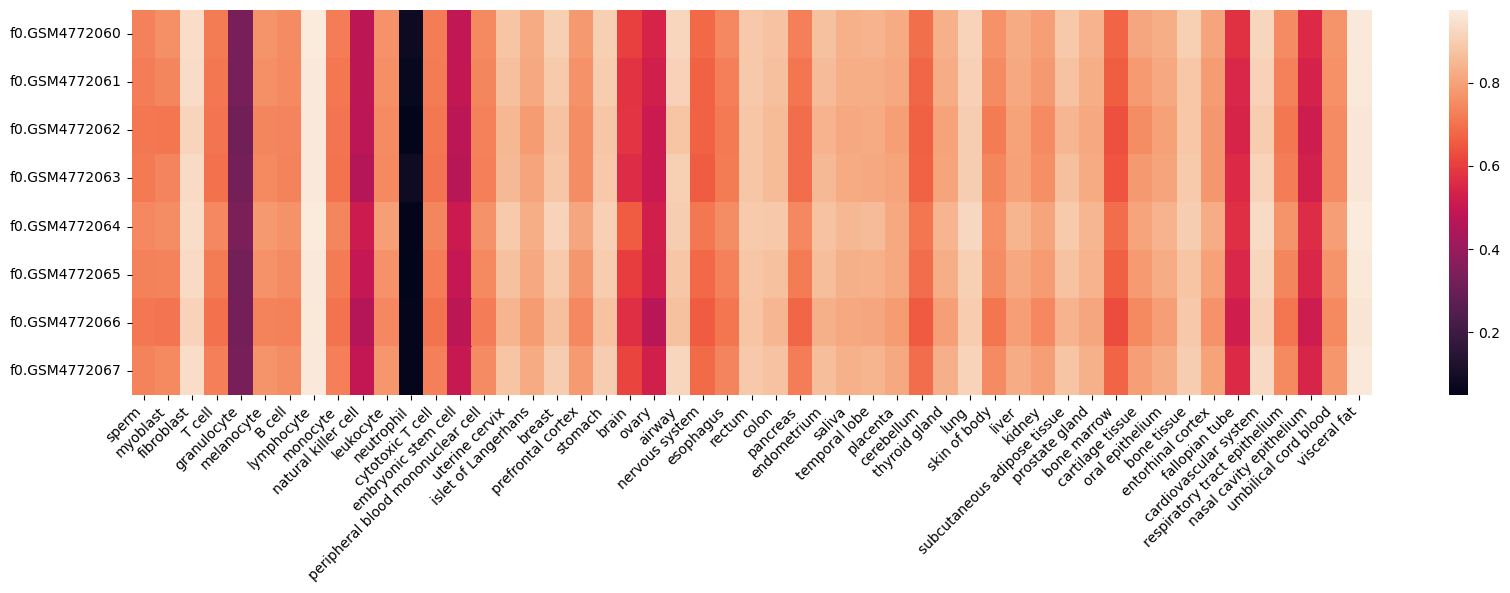

In [47]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_expanded, xticklabels=[id_to_name[x][0] for x in df_expanded.columns],yticklabels=True)

plt.xticks(rotation=45, ha='right')
plt.show()

In [48]:
[id_to_name[x][0] for x in res_df['pred']]

['lymphocyte',
 'lymphocyte',
 'lymphocyte',
 'lymphocyte',
 'visceral fat',
 'lymphocyte',
 'lymphocyte',
 'lymphocyte']